In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

## 线性规划是苏联经济学的核心，苏联经济学不同于西方的经济学，本质上是就是在一群学者，统计人员的手里扼住市场那只看不见的手。
## 单纯从生产力的角度理解来说，苏联经济学无疑是要先进于西方的原教旨市场经济的。虽然存在瑕疵，但是通过主动干预来扼住那只手，提高生产效率这一点上很成功
## 仅用不到4亿人口，无法完成4亿人口的全产业链结构，对抗压制西方世界几十年。毫无疑问要感谢于这套科学的计划经济理论。虽然最终失败，但是毫无疑问的展示了他们的经济制度的强大规划能力。
## 当今，线性规划问题依然是生产，组织，和投行大佬的最爱

用一个例子来解释线性规划的原理

In [2]:
table = pd.DataFrame({'Food':['Oatmeal(燕麦)','Whole milk(全奶)','Whole milk(全奶)','Pork with beans(猪肉)','condition(条件)'],'Energy（能量)':[110,160,420,260,'>=2000'],'Protein(蛋白质)':[4,8,4,14,'>=55'],'Calcium（钙)':[2,285,22,80,'>=800'],'Price':[3,9,20,19,'sum = '+(3+9+20+19).__repr__()]})
table

,Food,Energy（能量),Protein(蛋白质),Calcium（钙),Price
0,Oatmeal(燕麦),110,4,2,3
1,Whole milk(全奶),160,8,285,9
2,Whole milk(全奶),420,4,22,20
3,Pork with beans(猪肉),260,14,80,19
4,condition(条件),>=2000,>=55,>=800,sum = 51


## 要求我们买的食物中，至少要有2000的能量，55的蛋白质，800的钙，怎样买最省钱？
## 设买燕麦、全奶、草莓派、猪肉为x1,x2,x3,x4
## 于是我们可以写出如下的不等式组：
### $  z_{min} = { 3x_1 + 9x_2 + 20x_3 + 19x_4}$
$ s.t.\begin{cases}
110x_1 + 160x_2 + 420x_3 + 260x_4 >= 2000\\
4x_1 + 8x_2 + 4x_3 + 14x_4 >= 55\\
2x_1 + 285x_2 + 22x_3 + 80x_4 >= 800\\
x_1 , x_2 , x_3 , x_4 >= 0\\
\end{cases} $

$ min : z = { 3x_1 + 9x_2 + 20x_3 + 19x_4}$

In [3]:
c1 = np.array([3,9,20,19])
c1

array([ 3,  9, 20, 19])

$ s.t.\begin{cases}
110x_1 + 160x_2 + 420x_3 + 260x_4\\
4x_1 + 8x_2 + 4x_3 + 14x_4\\
2x_1 + 285x_2 + 22x_3 + 80x_4\\
\end{cases} $

In [4]:
A1 = -np.array([[110,160,420,260],[4,8,4,14],[2,285,22,80]])
A1

array([[-110, -160, -420, -260],
       [  -4,   -8,   -4,  -14],
       [  -2, -285,  -22,  -80]])

$ >=2000,>=500,>=800 $

In [5]:
b1 = np.array([2000,55,800])
b1

array([2000,   55,  800])

$ x_1 , x_2 , x_3 , x_4 >= 0 $

In [6]:
Aeq1 = np.array([np.ones(4)])
Aeq1

array([[1., 1., 1., 1.]])

$ z = { 3x_1 + 9x_2 + 20x_3 + 19x_4} $

In [7]:
beq1 = np.array([3+9+20+19])
beq1

array([51])

In [8]:
bounds=((0,None),(0,None),(0,None),(0,None))
bounds

((0, None), (0, None), (0, None), (0, None))

In [9]:
ressimplex = optimize.linprog(-c1,A1,b1,Aeq1,beq1,bounds=bounds)
ressimplex

     con: array([3.04292271e-08])
     fun: -1019.9999925547494
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([23419.99943689,   259.00002987,  1922.00021145])
  status: 0
 success: True
       x: array([1.20253082e-07, 1.69151390e-07, 5.09999967e+01, 2.93169829e-06])

In [10]:
{'目标函数最小值':ressimplex.fun,'解':ressimplex.x}

{'目标函数最小值': -1019.9999925547494,
 '解': array([1.20253082e-07, 1.69151390e-07, 5.09999967e+01, 2.93169829e-06])}

In [11]:
{'验证目标函数最小值(计算最小价格组合每样一个)':np.dot(c1,ressimplex.x)}

{'验证目标函数最小值(计算最小价格组合每样一个)': 1019.9999925547494}

In [12]:
table

,Food,Energy（能量),Protein(蛋白质),Calcium（钙),Price
0,Oatmeal(燕麦),110,4,2,3
1,Whole milk(全奶),160,8,285,9
2,Whole milk(全奶),420,4,22,20
3,Pork with beans(猪肉),260,14,80,19
4,condition(条件),>=2000,>=55,>=800,sum = 51


In [13]:
def linprog_fun(table):
    exprarr = table.to_numpy()[:-1,1:].astype(int)
    m,n = exprarr.shape
    A = -exprarr[:,:n-1].T
    conditionV = np.array([i.split('=') for i in table[4:].to_numpy()[0][1:]])
    def condition(x):
        r =[]
        for i in x:
            symbol,value = i[0],int(i[-1])
            print(symbol,value)
            if symbol == '<':
                r.append(value)
            elif symbol == '>':
                r.append(-value)
        return np.array(r)
    b = condition(conditionV)
    Aeq = np.array([np.ones(n)])
    beq = np.array([int(list(table.Price[n:])[0].split('=')[-1])])
    bounds = tuple([(0,None) for i in range(n)])
    c = table.Price[:4].to_numpy()
    expr = optimize.linprog(-c,A,b,Aeq,beq,bounds=bounds)  
    return {'目标函数最小值':expr.fun,'解':expr.x,'验证目标函数最小值(计算最小价格组合每样一个)':np.dot(c1,ressimplex.x)},expr
    
linprog_fun(table)

> 2000
> 55
> 800
sum  51


({'目标函数最小值': -1019.9999994582695,
  '解': array([4.65007934e-09, 3.08543762e-09, 5.09999996e+01, 3.86213527e-07]),
  '验证目标函数最小值(计算最小价格组合每样一个)': 1019.9999925547494},
      con: array([2.12629203e-09])
      fun: -1019.9999994582695
  message: 'Optimization terminated successfully.'
      nit: 11
    slack: array([19419.99993507,   149.00000387,   322.00002307])
   status: 0
  success: True
        x: array([4.65007934e-09, 3.08543762e-09, 5.09999996e+01, 3.86213527e-07]))

# 投资决策当中的线性规划问题

In [14]:
def factorial(N):
    n = 1
    for i in range(1,N+1):
        n *= i
    return n

def Ank(n,k):
    return factorial(n)/factorial(n-k)

def Cnk(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def bernoulliDistribution(n,X,P):
    k = X
    return Cnk(n,k)*(P**k)*((1-P)**(n-k))

def Epb(n,k,P):
    return 1/bernoulliDistribution(n,k,P)

def pocssonDistribution(n,k,p):
    Lambda = n*p
    probability = np.array([(np.exp(-Lambda)*Lambda**ki)/np.math.factorial(ki) for ki in range(k+1)])
    cumulativeProbability = np.array([np.dot(probability[:i],np.ones(i)) for i in range(1,len(probability)+1)])
    return probability[:-1],cumulativeProbability[:-1],Lambda

def pocssonDistribution_to_table(n,k,p):
    probability,cumulativeProbability,Lambda = pocssonDistribution(n,k,p)
    return pd.DataFrame({'k':range(1,len(probability)+1),'Lambda':Lambda,'单次概率':probability,'累计概率':cumulativeProbability})

In [15]:
n = 50
info = pd.DataFrame({'年份':np.arange(2020-n,2020),'餐饮':np.random.randn(n)*10000,'房地产':np.random.randn(n)*100000,'卫生':np.random.randn(n)*10000,'餐饮成本':abs(np.random.randn(n)*100),'房地产成本':abs(np.random.randn(n)*1000),'卫生成本':abs(np.random.randn(n)*10)})
info.head()

,年份,餐饮,房地产,卫生,餐饮成本,房地产成本,卫生成本
0,1970,-19541.604442,132705.865566,-3321.788195,50.679465,1628.698418,14.667336
1,1971,-6348.479291,27892.307113,14755.525615,41.469507,3501.557062,12.304901
2,1972,-1106.411357,-52915.753155,-2394.187727,20.934768,2091.224763,4.203692
3,1973,-10163.957142,103691.228206,-9512.826751,65.980293,252.959419,2.431709
4,1974,-22224.011637,-2599.306782,-5810.752823,181.596677,605.494534,2.628882


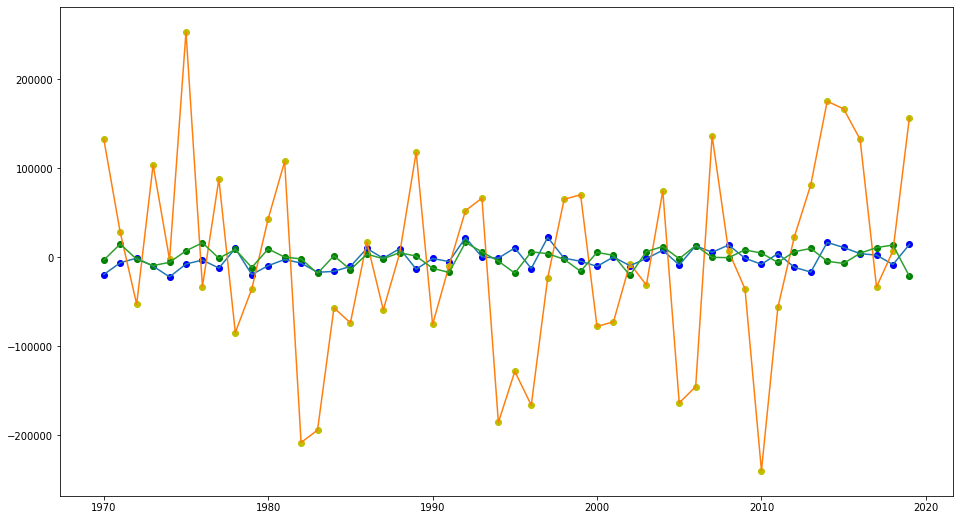

In [16]:
plt.figure(figsize=(16,9))
plt.plot(info.年份,info.餐饮)
plt.scatter(info.年份,info.餐饮,c='b')
plt.plot(info.年份,info.房地产)
plt.scatter(info.年份,info.房地产,c='y')
plt.plot(info.年份,info.卫生)
plt.scatter(info.年份,info.卫生,c='g')

## 通过变异系数看项目总体稳定性

In [17]:
stvalue = [info.房地产.mean()/info.房地产.std(),info.餐饮.mean()/info.餐饮.std(),info.卫生.mean()/info.卫生.std()]
stvalue

[-0.026808979043498642, -0.1944419497068192, -0.01573254982583062]

## 平均盈利能力

In [18]:
mean_ = [info.房地产.mean()/info.房地产成本.mean(),info.餐饮.mean()/info.餐饮成本.mean(),info.卫生.mean()/info.卫生成本.mean()]
mean_

[-3.3547591879571255, -21.7175487994764, -21.064681450855645]

## 计算盈利年份的概率

In [19]:
P = [info.房地产[info.房地产>0].shape[0]/info.shape[0],info.餐饮[info.餐饮>0].shape[0]/info.shape[0],info.卫生[info.卫生>0].shape[0]/info.shape[0]]
P

[0.48, 0.36, 0.52]

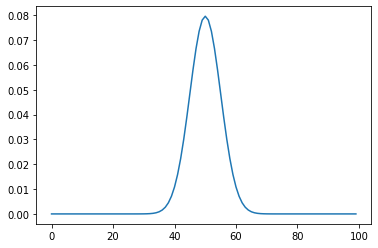

In [20]:
plt.plot([bernoulliDistribution(100,i,0.5) for i in range(100)])

# 其他的代码例子

$ max \quad z = 2x_1+3x_2-5x_3 \\ \quad\\
s.t.\begin{cases}
x_1+x_2+x_3 =7\\
2x_1-5x_2+x_3>=10\\
x_1+3x_2+x_3<=12\\
x_1,x_2,x_3>=0\\
\end{cases} $

In [21]:
c = np.array([2,3,-5])
A = np.array([[-2,5,-1],[1,3,1]])
b = np.array([-10,12])
Aeq = np.array([[1,1,1]])

beq = np.array([7])

In [22]:
c

array([ 2,  3, -5])

## >=10 所以*-1求最小

In [23]:
A

array([[-2,  5, -1],
       [ 1,  3,  1]])

In [24]:
b

array([-10,  12])

In [25]:
Aeq

array([[1, 1, 1]])

In [26]:
res = optimize.linprog(-c,A,b,Aeq,beq)

In [27]:
print(res)

con: array([1.80714554e-09])
     fun: -14.571428565645032
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24602559e-10,  3.85714286e+00])
  status: 0
 success: True
       x: array([6.42857143e+00, 5.71428571e-01, 2.35900788e-10])


fun就是目标函数最小值，x就是最优解